In [41]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/validation-set/validation_data_to_be_shared.csv
/kaggle/input/d14545454/Dev_data_to_be_shared.csv


In [14]:
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [16]:
# Settings for plots
%matplotlib inline
sns.set_style("whitegrid")  

In [17]:
dev_data = pd.read_csv("/kaggle/input/d14545454/Dev_data_to_be_shared.csv")

In [42]:
validation_set=pd.read_csv("/kaggle/input/validation-set/validation_data_to_be_shared.csv")

In [6]:
print("Shape of Development Dataset: ", dev_data.shape)

Shape of Development Dataset:  (96806, 1216)


In [7]:
# Head
dev_data.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,...,bureau_enquiry_47,bureau_enquiry_48,bureau_enquiry_49,bureau_enquiry_50,onus_attribute_43,onus_attribute_44,onus_attribute_45,onus_attribute_46,onus_attribute_47,onus_attribute_48
0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,221000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,25000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,86000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,215000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Tail
dev_data.tail()

In [ ]:
# 3.3 Column names
print("\nColumn Names in Development Dataset:")
print(dev_data.columns.tolist())

In [ ]:
print("\nData Types:")
print(dev_data.dtypes)


In [ ]:
print("\nDescriptive Statistics (Numeric Columns):")
display(dev_data.describe(include=[np.number]))

In [ ]:
print("\nDescriptive Statistics (Object/Categorical Columns):")
display(dev_data.describe(include=[object]))

# Step - 3: Sanity check

In [ ]:
#info()
dev_data.info()

Value Counts for bad_flag:
 bad_flag
0    95434
1     1372
Name: count, dtype: int64


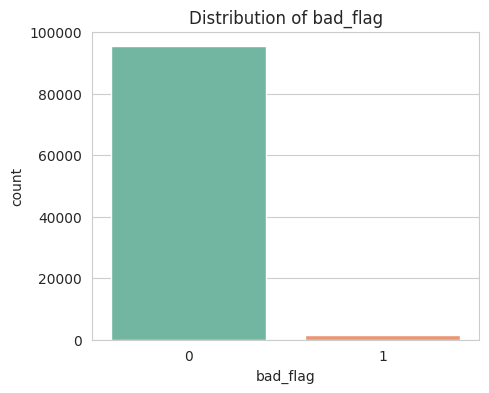


One column has 322 rows where bad_flag=1 AND the value is 0 or missing.

One column has 1371 rows where bad_flag=1 AND the value is 0 or missing.

One column has 1371 rows where bad_flag=1 AND the value is 0 or missing.

One column has 1371 rows where bad_flag=1 AND the value is 0 or missing.

One column has 1371 rows where bad_flag=1 AND the value is 0 or missing.

One column has 1371 rows where bad_flag=1 AND the value is 0 or missing.

One column has 1371 rows where bad_flag=1 AND the value is 0 or missing.

One column has 1372 rows where bad_flag=1 AND the value is 0 or missing.

One column has 1372 rows where bad_flag=1 AND the value is 0 or missing.

One column has 1372 rows where bad_flag=1 AND the value is 0 or missing.

One column has 1271 rows where bad_flag=1 AND the value is 0 or missing.

One column has 1271 rows where bad_flag=1 AND the value is 0 or missing.

One column has 1271 rows where bad_flag=1 AND the value is 0 or missing.

One column has 1349 rows where bad_fla

In [18]:

if 'bad_flag' in dev_data.columns:

    bad_flag_counts = dev_data['bad_flag'].value_counts(dropna=False)
    print("Value Counts for bad_flag:\n", bad_flag_counts)

    plt.figure(figsize=(5, 4))
    sns.countplot(x='bad_flag', data=dev_data, palette='Set2')
    plt.title("Distribution of bad_flag")
    plt.show()

    columns_of_interest = [
        col for col in dev_data.columns
        if col not in ['bad_flag', 'account_number']
    ]

    mask_bad1 = (dev_data['bad_flag'] == 1)
    for col in columns_of_interest:
        sub_df = dev_data.loc[
            mask_bad1 & ((dev_data[col] == 0) | (dev_data[col].isnull()))
        ]
        count_zero_or_missing = len(sub_df)
        if count_zero_or_missing > 0:
            print(
                f"\nOne column has {count_zero_or_missing} rows where bad_flag=1 "
                "AND the value is 0 or missing."
            )

    mask_bad0 = (dev_data['bad_flag'] == 0)
    always_zero_bad1_but_nonzero_bad0 = []

    for col in columns_of_interest:
        # Fill missing with 0 for the two subsets
        sub_data_bad1 = dev_data.loc[mask_bad1, col].fillna(0)
        sub_data_bad0 = dev_data.loc[mask_bad0, col].fillna(0)

        # Condition A: all zero for bad_flag==1
        all_zero_bad1 = (sub_data_bad1 == 0).all()

        # Condition B: at least one non-zero for bad_flag==0
        any_nonzero_bad0 = (sub_data_bad0 != 0).any()

        if all_zero_bad1 and any_nonzero_bad0:
            always_zero_bad1_but_nonzero_bad0.append(col)

    n_cols = len(always_zero_bad1_but_nonzero_bad0)
    if n_cols > 0:
        print(
            f"\nNumber of columns that are ALWAYS zero for bad_flag==1 but have "
            f"at least one non-zero for bad_flag==0: {n_cols}"
        )
    else:
        print(
            "\nNo column is strictly zero across all rows with bad_flag==1 "
            "and also non-zero for at least one row with bad_flag==0."
        )

else:
    print("The dataset does not contain 'bad_flag'—nothing to analyze.")


In [19]:
special_cols = always_zero_bad1_but_nonzero_bad0

Value Counts for bad_flag:
 bad_flag
0    95434
1     1372
Name: count, dtype: int64


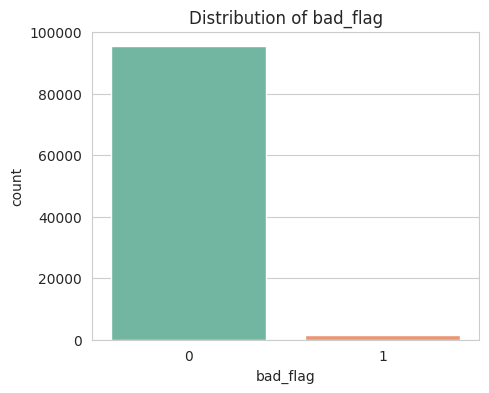


One column has 322 rows where bad_flag=1 AND the value is missing (NaN).

One column has 322 rows where bad_flag=1 AND the value is missing (NaN).

One column has 322 rows where bad_flag=1 AND the value is missing (NaN).

One column has 322 rows where bad_flag=1 AND the value is missing (NaN).

One column has 322 rows where bad_flag=1 AND the value is missing (NaN).

One column has 322 rows where bad_flag=1 AND the value is missing (NaN).

One column has 322 rows where bad_flag=1 AND the value is missing (NaN).

One column has 322 rows where bad_flag=1 AND the value is missing (NaN).

One column has 322 rows where bad_flag=1 AND the value is missing (NaN).

One column has 322 rows where bad_flag=1 AND the value is missing (NaN).

One column has 322 rows where bad_flag=1 AND the value is missing (NaN).

One column has 322 rows where bad_flag=1 AND the value is missing (NaN).

One column has 322 rows where bad_flag=1 AND the value is missing (NaN).

One column has 322 rows where bad_fla

In [16]:
# Ensure that the dataset has 'bad_flag'
if 'bad_flag' in dev_data.columns:

    bad_flag_counts = dev_data['bad_flag'].value_counts(dropna=False)
    print("Value Counts for bad_flag:\n", bad_flag_counts)

    plt.figure(figsize=(5, 4))
    sns.countplot(x='bad_flag', data=dev_data, palette='Set2')
    plt.title("Distribution of bad_flag")
    plt.show()

    columns_of_interest = [
        col for col in dev_data.columns
        if col not in ['bad_flag', 'account_number']
    ]

    mask_bad1 = (dev_data['bad_flag'] == 1)
    for col in columns_of_interest:
        sub_df = dev_data.loc[mask_bad1 & dev_data[col].isnull()]
        # If there are any matching rows, print the count
        count_missing = len(sub_df)
        if count_missing > 0:
            print(
                f"\nOne column has {count_missing} rows where bad_flag=1 "
                "AND the value is missing (NaN)."
            )
            # We do NOT print the column name or account_number details.

    mask_bad0 = (dev_data['bad_flag'] == 0)
    always_nan_bad1_but_nonmissing_bad0 = []

    for col in columns_of_interest:
        # Extract data for the two subsets
        sub_data_bad1 = dev_data.loc[mask_bad1, col]
        sub_data_bad0 = dev_data.loc[mask_bad0, col]

        # Condition A: ALL missing (NaN) for bad_flag==1
        # isnull().all() -> True if every row is missing
        all_missing_bad1 = sub_data_bad1.isnull().all()

        # Condition B: At least ONE non-missing for bad_flag==0
        # notnull().any() -> True if there's at least one valid (non-NaN) value
        any_nonmissing_bad0 = sub_data_bad0.notnull().any()

        if all_missing_bad1 and any_nonmissing_bad0:
            always_nan_bad1_but_nonmissing_bad0.append(col)

    n_cols = len(always_nan_bad1_but_nonmissing_bad0)
    if n_cols > 0:
        print(
            f"\nNumber of columns that are ALWAYS NaN for bad_flag==1 but have "
            f"at least one non-missing value for bad_flag==0: {n_cols}"
        )
    else:
        print(
            "\nNo column is strictly NaN across all rows with bad_flag==1 "
            "and also non-missing for at least one row with bad_flag==0."
        )

else:
    print("The dataset does not contain 'bad_flag'—nothing to analyze.")

In [28]:
# Data Cleaning

df = dev_data.copy()

print("Initial shape of df:", df.shape)

cols_all_zero = []
for col in df.columns:
    if df[col].fillna(0).eq(0).all() and col not in ['bad_flag']:
        cols_all_zero.append(col)

cols_to_drop_allzero = [c for c in cols_all_zero if c not in special_cols]
df.drop(columns=cols_to_drop_allzero, inplace=True)
print(f"Dropped {len(cols_to_drop_allzero)} columns that were entirely zero (not in special_cols).")

missing_fraction = df.isnull().mean()
cols_high_nan = missing_fraction[missing_fraction > 0.80].index.tolist()
cols_to_drop_nan = [c for c in cols_high_nan if c not in special_cols + ['bad_flag']]
df.drop(columns=cols_to_drop_nan, inplace=True)
print(f"Dropped {len(cols_to_drop_nan)} columns that had >80% NaN (not in special_cols).")

zero_fraction = df.fillna(0).eq(0).mean()
cols_high_zero = zero_fraction[zero_fraction > 0.80].index.tolist()
cols_to_drop_zeros = [c for c in cols_high_zero if c not in special_cols + ['bad_flag']]
df.drop(columns=cols_to_drop_zeros, inplace=True)
print(f"Dropped {len(cols_to_drop_zeros)} columns that had >80% zeros (not in special_cols).")

print("Shape after cleaning steps:", df.shape)

# KNN Imputation on numeric columns

from cuml.neighbors import NearestNeighbors
import cupy as cp
import math

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

numeric_cols_gpu = cp.array(df[numeric_cols].values)

num_gpus = cp.cuda.runtime.getDeviceCount()
print(f"Number of GPUs available: {num_gpus}")

num_rows = numeric_cols_gpu.shape[0]
rows_per_gpu = math.ceil(num_rows / num_gpus)

gpu_data_parts = []
for i in range(num_gpus):
    start_row = i * rows_per_gpu
    end_row = min(start_row + rows_per_gpu, num_rows)
    # Ensure the array part is contiguous in memory
    gpu_data_parts.append(cp.array(numeric_cols_gpu[start_row:end_row]))

# Function to perform imputation on a single GPU
def gpu_knn_impute(data_part, gpu_id, full_data):
    cp.cuda.Device(gpu_id).use()  # Activate the specific GPU

    # Ensure data is on the active GPU and contiguous
    data_part = cp.array(data_part, copy=True)
    full_data = cp.array(full_data, copy=True)

    knn = NearestNeighbors(n_neighbors=5)
    knn.fit(full_data)  # Fit the full dataset to ensure consistent neighbor selection

    nan_masks = cp.isnan(data_part)

    for row_idx in range(data_part.shape[0]):
        if nan_masks[row_idx].any():  # Check if the row contains NaN
            row = data_part[row_idx]
            distances, indices = knn.kneighbors(row.reshape(1, -1), return_distance=True)
            nearest_neighbors = full_data[indices[0]]

            # Replace NaNs with the mean of the nearest neighbors for each column
            nan_mask = nan_masks[row_idx]
            row[nan_mask] = cp.nanmean(nearest_neighbors[:, nan_mask], axis=0)
    
    return data_part

# Perform imputation on all GPUs in parallel
imputed_data_parts = []
for gpu_id, data_part in enumerate(gpu_data_parts):
    cp.cuda.Device(gpu_id).use()  
    imputed_part = gpu_knn_impute(data_part, gpu_id, numeric_cols_gpu)
    imputed_data_parts.append(imputed_part)

# Transfer all partitions back to CPU for concatenation
imputed_data_cpu = [cp.asnumpy(part) for part in imputed_data_parts]
imputed_data_combined = np.concatenate(imputed_data_cpu, axis=0)

# Convert back to pandas DataFrame
df[numeric_cols] = imputed_data_combined
print("GPU-based KNN imputation completed using multiple GPUs.")


Initial shape of df: (96806, 1216)
Dropped 50 columns that were entirely zero (not in special_cols).
Dropped 12 columns that had >80% NaN (not in special_cols).
Dropped 807 columns that had >80% zeros (not in special_cols).
Shape after cleaning steps: (96806, 347)
Number of GPUs available: 2
GPU-based KNN imputation completed using multiple GPUs.


In [24]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["VECLIB_MAXIMUM_THREADS"] = "1"
os.environ["NUMEXPR_NUM_THREADS"] = "1"

In [27]:
from cuml.neighbors import NearestNeighbors

In [23]:
!pip install --extra-index-url=https://pypi.nvidia.com cuml-cu11 --upgrade


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 GB 25.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 135.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 GB 23.9 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.4/134.4 kB 140.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.2/67.2 kB 89.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.1/567.1 MB 56.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.9/196.9 MB 101.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 206.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 192.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.8/452.8 MB 60.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [25]:
import cuml
print("RAPIDS cuML version:", cuml.__version__)


RAPIDS cuML version: 24.12.00


In [29]:
# ALTERNATIVE 1: Advanced Feature Extraction (Random Forest Feature Selection)
def advanced_feature_extraction_rf(df, target_col):
    print("\n[Alternative 1: Random Forest Feature Selection]")

    X = df.drop(columns=[target_col], errors='ignore')
    y = df[target_col]

    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X, y)

    importances = rf.feature_importances_
    features = X.columns
    sorted_idx = np.argsort(importances)[::-1]

    print("Top 10 features by importance:")
    for i in range(min(10, len(features))):
        idx = sorted_idx[i]
        print(f"  {features[idx]} -> importance: {importances[idx]:.4f}")

    selector = SelectFromModel(rf, threshold="median", prefit=True)
    X_reduced = selector.transform(X)

    print(f"Original feature count: {X.shape[1]}")
    print(f"Reduced feature count:  {X_reduced.shape[1]}")

    return X_reduced


In [31]:
# # ALTERNATIVE 2: PCA Analysis
# def pca_analysis(df, target_col, n_components=10):
#     print("\n[Alternative 2: PCA Dimensionality Reduction]")

#     X = df.drop(columns=[target_col], errors='ignore')
#     y = df[target_col]

#     numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
#     X_numeric = X[numeric_cols]

#     scaler = StandardScaler()
#     X_scaled = scaler.fit_transform(X_numeric)

#     pca = PCA(n_components=n_components, random_state=42)
#     X_pca = pca.fit_transform(X_scaled)

#     explained_variance = pca.explained_variance_ratio_
#     cum_expl_var = np.cumsum(explained_variance)

#     print(f"PCA -> requested {n_components} components.")
#     print("Explained variance ratio per component:")
#     for i, ev in enumerate(explained_variance):
#         print(f"  PC{i+1}: {ev:.4f}")
#     print("Cumulative explained variance:", cum_expl_var)

#     print(f"Original numeric feature count: {X_numeric.shape[1]}")
#     print(f"Reduced dimension (PCA): {X_pca.shape[1]}")

#     return X_pca


In [30]:
# Option 1: Random Forest Feature Selection
X_reduced_rf = advanced_feature_extraction_rf(df, 'bad_flag')



[Alternative 1: Random Forest Feature Selection]
Top 10 features by importance:
  onus_attribute_2 -> importance: 0.0133
  onus_attribute_17 -> importance: 0.0107
  onus_attribute_23 -> importance: 0.0099
  onus_attribute_20 -> importance: 0.0096
  bureau_439 -> importance: 0.0083
  bureau_450 -> importance: 0.0081
  account_number -> importance: 0.0080
  bureau_443 -> importance: 0.0074
  bureau_452 -> importance: 0.0074
  bureau_442 -> importance: 0.0073
Original feature count: 346
Reduced feature count:  173


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [38]:
import pandas as pd

# Exclude the first column from the feature set
first_column_name = df.columns[0]

# Extract the reduced feature names from the original dataset (excluding the first column)
original_feature_names = df.drop(columns=[first_column_name, 'bad_flag']).columns.tolist()

# Create a DataFrame for the reduced features with their original names
X_reduced_df = pd.DataFrame(
    X_reduced_rf, 
    columns=original_feature_names[:X_reduced_rf.shape[1]]  # Use the first n reduced feature names
)

X_reduced_df['bad_flag'] = df['bad_flag'].values

X_reduced_df.insert(0, first_column_name, df[first_column_name].values)

df_extracted = X_reduced_df

print("Shape of df_extracted:", df_extracted.shape)
df_extracted.head()


Shape of df_extracted: (96806, 175)


,account_number,onus_attribute_1,transaction_attribute_7,transaction_attribute_8,transaction_attribute_9,transaction_attribute_31,transaction_attribute_32,transaction_attribute_33,transaction_attribute_52,transaction_attribute_53,...,transaction_attribute_622,transaction_attribute_624,transaction_attribute_628,transaction_attribute_636,transaction_attribute_643,transaction_attribute_652,transaction_attribute_654,transaction_attribute_655,transaction_attribute_657,bad_flag
0,1.0,1.0,25000.0,1267.019989,974.12,4882.019989,7.0,1826.00,4882.019989,7.0,...,0.0,2.0,0.0,1.0,3.0,0.0,3.0,0.0,1.0,0.0
1,2.0,2.0,221000.0,0.000000,0.00,142874.657900,25.0,50000.74,142874.657900,25.0,...,2.0,3.0,1.0,2.0,6.0,2.0,4.0,1.0,3.0,0.0
2,3.0,3.0,25000.0,1517.699982,505.90,7972.500031,5.0,3629.00,7972.500031,5.0,...,0.0,11.0,2.0,8.0,11.0,0.0,11.0,2.0,8.0,0.0
3,4.0,4.0,86000.0,859.220001,252.50,12684.720000,6.0,10999.00,12684.720000,6.0,...,0.0,24.0,2.0,21.0,38.0,0.0,38.0,6.0,30.0,0.0
4,5.0,5.0,215000.0,0.000000,0.00,483.000000,1.0,483.00,483.000000,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0


In [39]:
from imblearn.over_sampling import SMOTE
import pandas as pd

X = df_extracted.drop(columns=['bad_flag'])  # Features
y = df_extracted['bad_flag']                 # Target

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

df_smote = pd.DataFrame(X_smote, columns=X.columns)  # Balanced features
df_smote['bad_flag'] = y_smote                      # Add the target back

print("Shape of original data:", df_extracted.shape)
print("Shape of balanced data (SMOTE):", df_smote.shape)
print("Class distribution after SMOTE:\n", df_smote['bad_flag'].value_counts())


Shape of original data: (96806, 175)
Shape of balanced data (SMOTE): (190868, 175)
Class distribution after SMOTE:
 bad_flag
0.0    95434
1.0    95434
Name: count, dtype: int64


<ipython-input-39-d264b0e7b2f8>:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_smote['bad_flag'] = y_smote                      # Add the target back


In [40]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


X = df_smote.drop(columns=['bad_flag'])  # Features
y = df_smote['bad_flag']                 # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',  # Binary classification
    eval_metric='logloss',       # Evaluation metric
    use_label_encoder=False,     # Suppress label encoding warning
    random_state=42,
    n_jobs=-1                     # Use all CPU cores
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     19087
         1.0       1.00      0.99      0.99     19087

    accuracy                           0.99     38174
   macro avg       0.99      0.99      0.99     38174
weighted avg       0.99      0.99      0.99     38174

Confusion Matrix:
[[19084     3]
 [  263 18824]]
Accuracy Score:
0.9930319065332425


In [44]:

X_validation = validation_set.drop(columns=['bad_flag'], errors='ignore')

X_validation = X_validation[X_train.columns]  # Align columns to the training set

validation_predictions = xgb_model.predict(X_validation)

validation_probabilities = xgb_model.predict_proba(X_validation)

validation_set['predicted_label'] = validation_predictions
validation_set['predicted_probability'] = validation_probabilities[:, 1]  # Probability for class 1

output_file = "validation_predictions.csv"
validation_set.to_csv(output_file, index=False)

print(f"Validation predictions saved to {output_file}.")


Validation predictions saved to validation_predictions.csv.


In [32]:
# # Option 2: PCA Analysis
# X_reduced_pca = pca_analysis(df, 'bad_flag', n_components=5)


[Alternative 2: PCA Dimensionality Reduction]
PCA -> requested 5 components.
Explained variance ratio per component:
  PC1: 0.0896
  PC2: 0.0631
  PC3: 0.0580
  PC4: 0.0444
  PC5: 0.0382
Cumulative explained variance: [0.08957913 0.15262966 0.21058829 0.25496846 0.29317151]
Original numeric feature count: 346
Reduced dimension (PCA): 5
